<a href="https://colab.research.google.com/github/guilhermebioni/PUC-RJ_MVP/blob/main/Guilherme_Bioni_MVP_PUC_RJ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MVP Análise de Dados e Boas Práticas**

**Nome:** Guilherme Ferreira Bioni e Silva

**Matrícula:** 4052025000956

**Dataset:**
[Estimation of Obesity Levels Based On Eating Habits and Physical Condition](https://archive.ics.uci.edu/dataset/544/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition)

# **Descrição do Problema**

O Dataset proposto para este MVP inclui dados para a estimativa dos níveis de obesidade em indivíduos dos paíes México, Peru e Colômbia com base em seus hábitos alimentares e condição física. O objetivo principal do conjunto de dados é classificar os níveis de obesidade dos indíviduos em sete classes diferentes: Peso Insuficiente, Peso Normal, Sobrepeso Nível I, sobrepeso Nível II, Obesidade Tipo I, Obesidade tipo II, Obesidade Tipo III.

# Hipóteses do Problema

Foram traçadas as seguintes hipóteses:

1.   Os diferentes níveis de obesidade podem ser diferenciados com base nas informações de peso, altura e idade?
2.   Existe correlação entre as variáveis numéricas do DataSet?
3.   O nível de obesidade "Obeso" é mais facilmente separável dos outros níveis analisando apenas as variáveis peso e altura?







# **Tipo de Problema**

Este é um problema de **classificação supervisionada**. Dado o conjunto de características, o objetivo é prever a qual das 7 classes um determinado indivíduo pertence. Para facilitar o estudo e melhorar a visualização dos gráficos, as 7 classes foram resumidas em apenas 4 (Abaixo, Normal, Acima, Obeso).

# Atributos do Conjunto de Dados

O conjunto de dados contém 17 atributos e 2111 instâncias. Atributos:


*   ***Gender*** (Gênero)
*   ***Age*** (Idade)
*   ***Height*** (Altura em metros)
*   ***Weight*** (Peso em Kg)
*   ***Family_history_with_overweight*** (Membro da família sofreu ou sofre de sobrepeso)
*   ***FAVC*** (Ingestão de alimentos altamente calóricos com frequência)
*   ***FCVC*** (Costume de ingerir vegetais nas refeições diariamente)
*   ***NCP*** (Quantiadade de refeições principais diárias)
*   ***CAEC*** (Quantiadade de refeições entre as refeições principais diárias)
*   ***SMOKE*** (Fumante ou não-fumante)
*   ***CH20*** (Consumo de água diário)
*   ***SCC*** (Monitoramento de calorias que ingere diariamente)
*   ***FAF*** (Frequência de prática de atividades físicas)
*   ***TUE*** (Tempo de uso de dispositivos tecnológicos diário)
*   ***CALC*** (Frequência de bebidas alcoólicas semanal)
*   ***MTRANS*** (Meio de transporte mais usado)
*   ***NObeyesdad*** (Nível de obesidade)

As colunas estão em inglês. Mais adiante iremos renomear para português.


# Importação das Bibliotecas Necessárias e Carga de Dados
Esta seção consolida todas as importações de bibliotecas necessárias para a análise, visualização e pré-processamento dos dados, bem como o carregamento inicial do dataset.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

In [ ]:
# url a importar
url_dados = 'https://archive.ics.uci.edu/static/public/544/data.csv'

# carga do dataset através da url
base = pd.read_csv(url_dados)

In [ ]:
# 10 primeiras linhas do DataSet
base.head(10)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II
5,Male,29.0,1.62,53.0,no,yes,2.0,3.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Automobile,Normal_Weight
6,Female,23.0,1.50,55.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,0.0,Sometimes,Motorbike,Normal_Weight
7,Male,22.0,1.64,53.0,no,no,2.0,3.0,Sometimes,no,2.0,no,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
8,Male,24.0,1.78,64.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,1.0,Frequently,Public_Transportation,Normal_Weight
9,Male,22.0,1.72,68.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,1.0,1.0,no,Public_Transportation,Normal_Weight


O nome das colunas do DataSet estão em Inglês. Vamos renomear para tornar as análises mais intuitivas.

In [ ]:
# Renomeando as Colunas do Dataset
# Renomeia várias colunas
base.rename(columns={'Gender': 'genero', 'Age': 'idade', 'Height': 'altura', 'Weight': 'peso', 'family_history_with_overweight': 'familiar_sobrepeso', 'FAVC': 'ali_calo_com_freq', 'FCVC': 'consumo_vegetais_dia',
                     'NCP': 'qtd_ref_principal', 'CAEC': 'qtd_ref_nao_principal', 'SMOKE': 'fumante', 'CH2O': 'consumo_agua_dia', 'SCC': 'monitoramento_caloria', 'FAF': 'freq_ativ_fisica',
                     'TUE': 'tempo_uso_disp_elet_dia', 'CALC': 'freq_bebida_alc_sem', 'MTRANS': 'transporte_usado', 'NObeyesdad': 'nivel_obesidade'}, inplace=True)


# Análise de Dados
Nesta etapa, iremos fazer uma análise de dados exploratória (EDA) sobre o dataset, visando entender a distribuição, as relações e as características das variáveis. Etapa crucial para seguirmos com as fases subsequentes de pré-processamento e modelagem.

# Total e Tipo de Instâncias
O DataSet tem 2.111 instâncias, 17 atributos e **não** possui valores nulos.


Divisão dos atributos:

8 atributos do tipo numérico (float).

9 atributos do tipo categórico (object).

In [ ]:
print(base.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   genero                   2111 non-null   object 
 1   idade                    2111 non-null   float64
 2   altura                   2111 non-null   float64
 3   peso                     2111 non-null   float64
 4   familiar_sobrepeso       2111 non-null   object 
 5   ali_calo_com_freq        2111 non-null   object 
 6   consumo_vegetais_dia     2111 non-null   float64
 7   qtd_ref_principal        2111 non-null   float64
 8   qtd_ref_nao_principal    2111 non-null   object 
 9   fumante                  2111 non-null   object 
 10  consumo_agua_dia         2111 non-null   float64
 11  monitoramento_caloria    2111 non-null   object 
 12  freq_ativ_fisica         2111 non-null   float64
 13  tempo_uso_disp_elet_dia  2111 non-null   float64
 14  freq_bebida_alc_sem     

# Distribuição da Variável Resposta
A variável resposta do DataSet é o nível de obesidade (NObeyesdad).
Vamos verificar a distribuição desta variável.

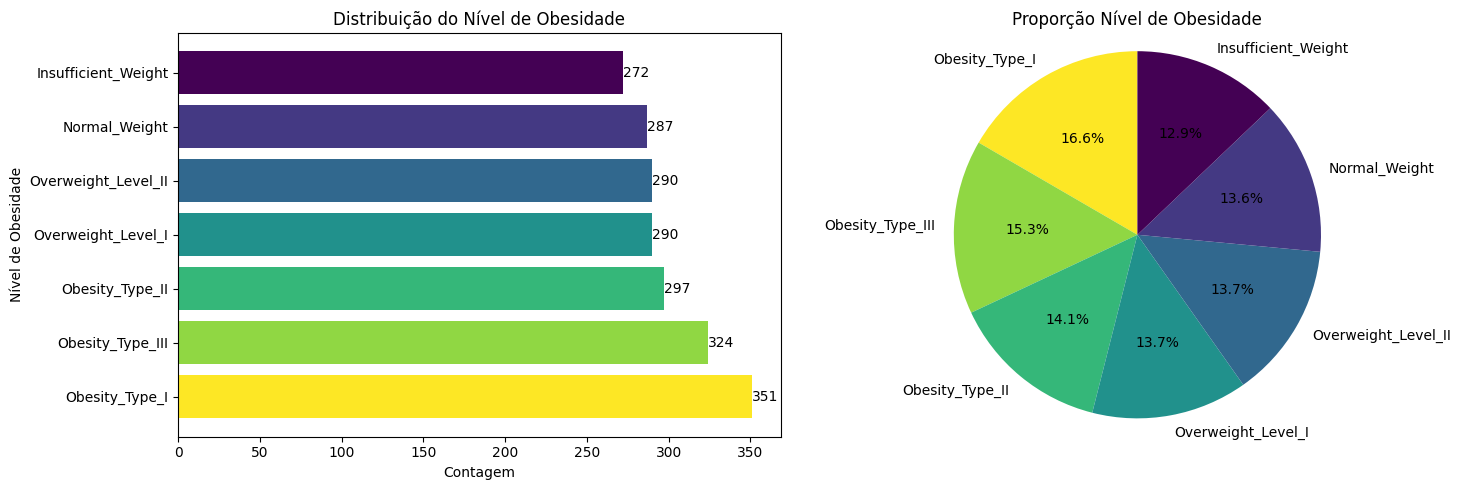

In [ ]:
# Dados para os gráficos
labels = ['Obesity_Type_I', 'Obesity_Type_III', 'Obesity_Type_II', 'Overweight_Level_I', 'Overweight_Level_II', 'Normal_Weight', 'Insufficient_Weight' ]
contagem_valores = base['nivel_obesidade'].value_counts() # Contagem dos níveis de obesidade
proporcao = base['nivel_obesidade'].value_counts(normalize=True) # Porporção dos níveis de obesidade
coresViridis = ['#fde725', '#90d743', '#35b779', '#21918c', '#31688e', '#443983', '#440154'] # Cores escolhidas para os gráficos

# Criando a figura e os subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))  # Definindo tamanho da figura do gráfico. (1 linha, 2 colunas)

# Gráfico de barras
ax1.barh(labels, contagem_valores, color=coresViridis)
ax1.bar_label(ax1.containers[0])
ax1.set_title('Distribuição do Nível de Obesidade') # Título do gráfico
ax1.set_xlabel('Contagem') # Título do eixo X
ax1.set_ylabel('Nível de Obesidade') # Título do eixo Y

# Gráfico de pizza
ax2.pie(proporcao, labels=labels, autopct='%1.1f%%', colors=coresViridis, startangle=90)
ax2.set_title('Proporção Nível de Obesidade')
ax2.axis('equal')  # A proporção de aspecto igual garante que a pizza seja desenhada como um círculo

# Ajustando o layout
plt.tight_layout()

# Exibindo os gráficos
plt.show()

A variável resposta nível de obesidade foi dividida em 7 níveis e possui bom balanceamento. Porém, vamos criar uma nova variável resposta agrupando os 7 níveis em apenas 4 com o objetivo de facilitar nossas análises.

Nova variável = "classe_peso": Abaixo, Normal, Acima, Obeso

Verificando a distribuição da nova variável resposta:

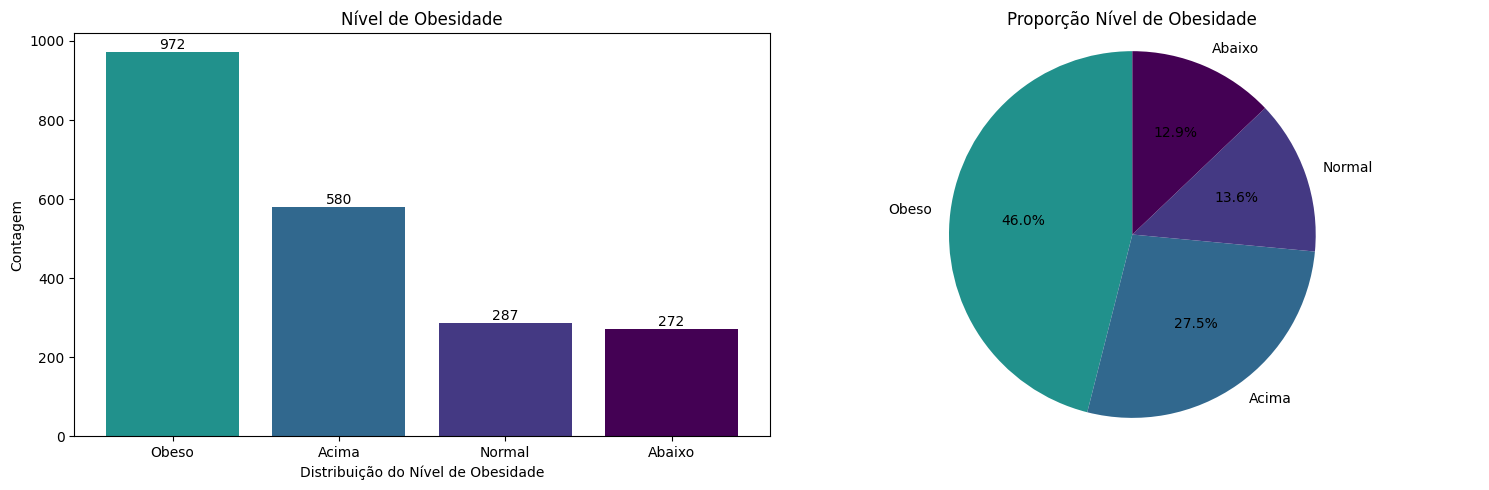

In [ ]:
base['classe_peso'] = np.where(base['nivel_obesidade'] == 'Insufficient_Weight', 'Abaixo',
                               np.where(base['nivel_obesidade'] == 'Normal_Weight', 'Normal',
                                        np.where(base['nivel_obesidade'] == 'Overweight_Level_I', 'Acima',
                                                 np.where(base['nivel_obesidade'] == 'Overweight_Level_II', 'Acima', 'Obeso'))))

# Dados para os gráficos
novos_labels = ['Obeso', 'Acima', 'Normal', 'Abaixo' ]
n_contagem_valores = base['classe_peso'].value_counts() # Contagem dos níveis de obesidade
novo_proporcao = base['classe_peso'].value_counts(normalize=True) # Porporção dos níveis de obesidade
n_coresViridis = ['#21918c', '#31688e', '#443983', '#440154'] # Cores escolhidas para os gráficos

# Criando a figura e os subplots
fig, (ax3, ax4) = plt.subplots(1, 2, figsize=(15, 5))  # Definindo tamanho da figura do gráfico. (1 linha, 2 colunas)

# Gráfico de barras
ax3.bar(novos_labels, n_contagem_valores, color=n_coresViridis)
ax3.bar_label(ax3.containers[0])
ax3.set_title('Nível de Obesidade') # Título do gráfico
ax3.set_xlabel('Distribuição do Nível de Obesidade') # Título do eixo X
ax3.set_ylabel('Contagem') # Título do eixo Y

# Gráfico de pizza
ax4.pie(novo_proporcao, labels=novos_labels, autopct='%1.1f%%', colors=n_coresViridis, startangle=90)
ax4.set_title('Proporção Nível de Obesidade')
ax4.axis('equal')  # A proporção de aspecto igual garante que a pizza seja desenhada como um círculo

# Ajustando o layout
plt.tight_layout()

# Exibindo os gráficos
plt.show()

A partir da nova variável resposta é possível verificar pelo gráfico acima que a base possui muitos indivíduos acima do peso (46%). Apenas 13% dos indivíduos estão no peso considerado normal.

_______________________________________________________________________________

# Estatísticas Descritivas
Estatísticas descritivas fornecem um resumo das características numéricas, incluindo média, desvio padrão, mínimo, máximo e quartis.

In [ ]:
# Estatísticas Descritivas Básicas do Dataset
# Sumário Estatístico
print("\nEstatísticas Descritivas:")
base.describe()


Estatísticas Descritivas:


,idade,altura,peso,consumo_vegetais_dia,qtd_ref_principal,consumo_agua_dia,freq_ativ_fisica,tempo_uso_disp_elet_dia
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [ ]:
# exibindo as estatísticas descritivas da média de idade, peso e altura, agrupado por nível de obesidade
print("\nEstatísticas descritivas da média de idade, peso e altura, agrupado por nível de obesidade:")
selecionando_colunas = ['idade', 'peso', 'altura', 'classe_peso']
base_filtrada = base.filter(items=selecionando_colunas) # Selecionando apenas as colunas de interesse
base_filtrada['classe_peso_aju'] = np.where(base_filtrada['classe_peso'] == 'Abaixo', '01 - Abaixo',
                                            np.where(base_filtrada['classe_peso'] == 'Normal', '02 - Normal',
                                                     np.where(base_filtrada['classe_peso'] == 'Acima', '03 - Acima','04 - Obeso')))

base_filtrada_nova = base_filtrada[['classe_peso_aju', 'idade', 'peso', 'altura']]
base_filtrada_nova.groupby('classe_peso_aju').describe()



Estatísticas descritivas da média de idade, peso e altura, agrupado por nível de obesidade:


idade                                                   \
                 count       mean       std   min        25%        50%   
classe_peso_aju                                                           
01 - Abaixo      272.0  19.783237  2.669511  16.0  18.000000  19.244594   
02 - Normal      287.0  21.738676  5.096756  14.0  19.000000  21.000000   
03 - Acima       580.0  25.207328  7.373501  16.0  20.000000  22.570324   
04 - Obeso       972.0  25.806181  5.918980  15.0  21.681806  25.138276   

                                   peso              ...                     \
                       75%   max  count        mean  ...         75%    max   
classe_peso_aju                                      ...                      
01 - Abaixo      21.000000  39.0  272.0   49.906330  ...   53.667843   65.0   
02 - Normal      23.000000  61.0  287.0   62.155052  ...   68.500000   87.0   
03 - Acima       29.706826  56.0  580.0   78.176050  ...   85.000000  102.0   
04 - Obeso       27.933529  52.0  972.0  109.082344  ...  120.036606  173.0   

                altura                                                \
                 count      mean       std   min       25%       50%   
classe_peso_aju                                                        
01 - Abaixo      272.0  1.691117  0.099687  1.52  1.599267  1.704180   
02 - Normal      287.0  1.676585  0.094526  1.50  1.600000  1.660000   
03 - Acima       580.0  1.695792  0.093039  1.45  1.625727  1.700000   
04 - Obeso       972.0  1.715553  0.088995  1.50  1.640744  1.724095   

                                 
                      75%   max  
classe_peso_aju                  
01 - Abaixo      1.758308  1.90  
02 - Normal      1.750000  1.93  
03 - Acima       1.756606  1.93  
04 - Obeso       1.780193  1.98  

[4 rows x 24 columns]

A partir da tabela acima é possível verificar que os indivíduos acima do peso ('Acima' e 'Obeso') possuem uma média de idade mais alta em relação às demais classes.

A mediana está em linha com a média, exceto na classe "03 - Acima" para a variável "Idade".

A classe "04 - Obeso" possui o maior desvio padrão dentro da variável "peso". Isto indica que os pesos nesta classe estão espalhado por uma faixa maior de valores.




# Histograma

# *Variável Peso*
Vamos verificar o histograma da variável peso por nível de obesidade.

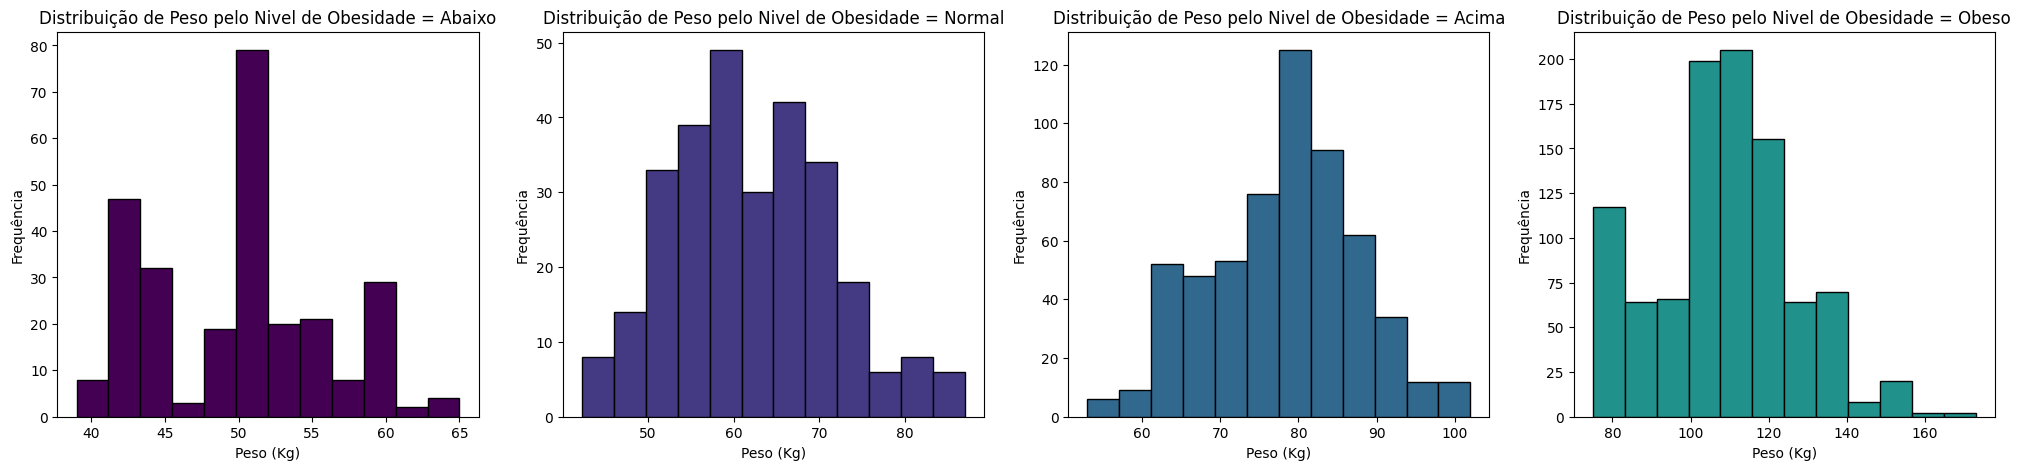

In [ ]:
# Criando a figura e os histogramas
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(25, 5))  # Definindo tamanho da figura do gráfico. (1 linha, 2 colunas)

base_idade_abaixo = base_filtrada[base_filtrada['classe_peso'] == 'Abaixo']
base_idade_normal = base_filtrada[base_filtrada['classe_peso'] == 'Normal']
base_idade_acima = base_filtrada[base_filtrada['classe_peso'] == 'Acima']
base_idade_obeso = base_filtrada[base_filtrada['classe_peso'] == 'Obeso']

# Histograma Nível de Obesidade = Abaixo
ax1.hist(base_idade_abaixo['peso'], bins=12, edgecolor='black', color='#440154')
ax1.set_title('Distribuição de Peso pelo Nivel de Obesidade = Abaixo')
ax1.set_xlabel('Peso (Kg)')
ax1.set_ylabel('Frequência')

# Histograma Nível de Obesidade = Normal
ax2.hist(base_idade_normal['peso'], bins=12, edgecolor='black', color='#443983')
ax2.set_title('Distribuição de Peso pelo Nivel de Obesidade = Normal')
ax2.set_xlabel('Peso (Kg)')
ax2.set_ylabel('Frequência')

# Histograma Nível de Obesidade = Acima
ax3.hist(base_idade_acima['peso'], bins=12, edgecolor='black', color='#31688e')
ax3.set_title('Distribuição de Peso pelo Nivel de Obesidade = Acima')
ax3.set_xlabel('Peso (Kg)')
ax3.set_ylabel('Frequência')

# Histograma Nível de Obesidade = Obeso
ax4.hist(base_idade_obeso['peso'], bins=12, edgecolor='black', color='#21918c')
ax4.set_title('Distribuição de Peso pelo Nivel de Obesidade = Obeso')
ax4.set_xlabel('Peso (Kg)')
ax4.set_ylabel('Frequência')

plt.show()

Os histogramas da variável peso aberto pelo nível de obesidade reforça a informação do desvio padrão de que os pesos no nível de obesidade "Obeso" estão espalhados por uma faixa maior de valores.

Os histogramas dos níveis "Normal" e "Obeso" sugerem uma distribuição bimodal, enquanto os níveis "abaixo" e "acima" unimodal.

# Boxplot

Para ajudar a entender as diferenças entre os níveis de obesidade, vamos fazer uma comparação gráfica através do Boxplot. Além de ilustrar as características de cada nível de obesidade, será possível visualizar a possível existência de outliers.

*Variável Idade*

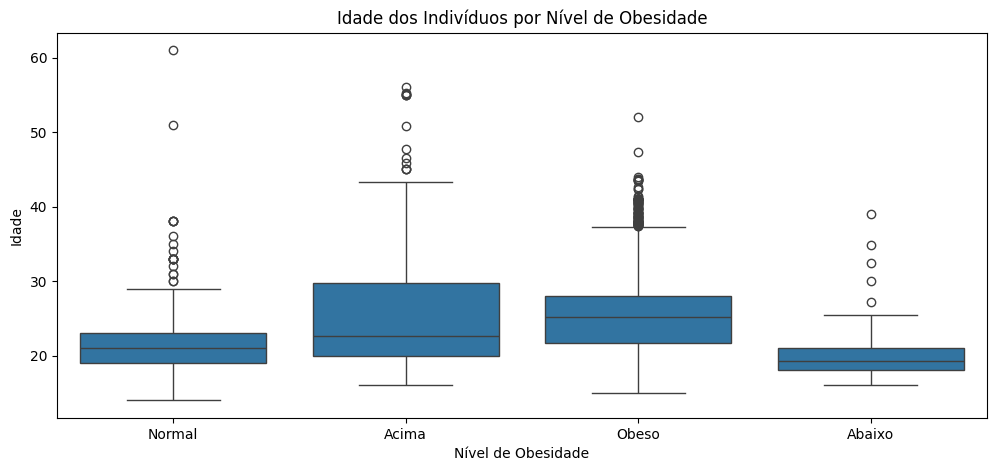

In [ ]:
# Boxplot da idade dos indivíduos por nível de obesidade
plt.figure(figsize=(12,5))
sns.boxplot(x='classe_peso', y='idade', data=base_filtrada)
plt.title('Idade dos Indivíduos por Nível de Obesidade')
plt.xlabel('Nível de Obesidade')
plt.ylabel('Idade')
plt.show()

O boxplot da idade por nível de obesidade mostra que o nível "Acima" possui valores de idade mais espalhados em relação aos outros níveis. Não há indícios de que a idade seja importante para a classificação final de nível de obesidade. **Todos** os níveis possuem outliers.

*Variável Peso*

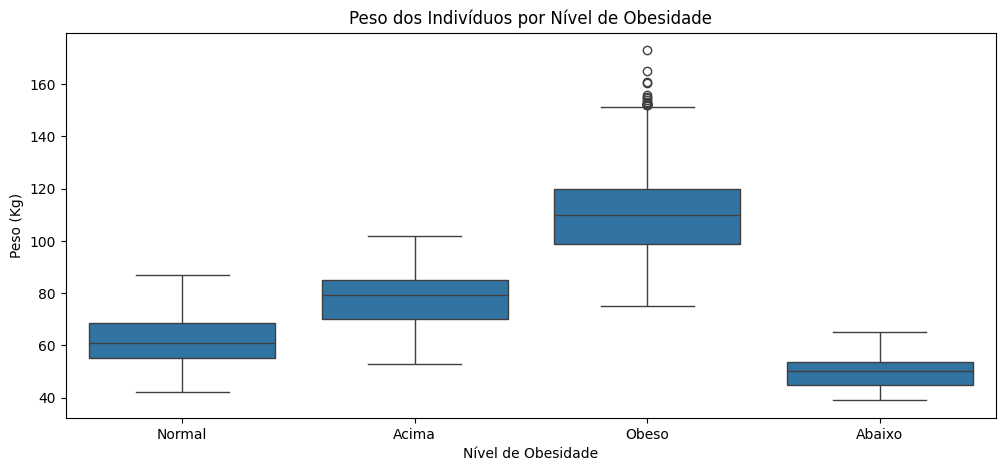

In [ ]:
# Boxplot do Peso dos indivíduos por nível de obesidade
plt.figure(figsize=(12,5))
sns.boxplot(x='classe_peso', y='peso', data=base_filtrada)
plt.title('Peso dos Indivíduos por Nível de Obesidade')
plt.xlabel('Nível de Obesidade')
plt.ylabel('Peso (Kg)')
plt.show()

O boxplot do peso mostra obviamente que os pesos mais altos estão nos níveis de obesidade "Acima" e "Obeso". Mas também é interessante observar que existem pesos que poderiam estar classificados em outros níveis de obesidade. Isso indica que a classificação final é composta por outros atributos. Existem outliers para o nível "Obeso".   

*Variável Altura*

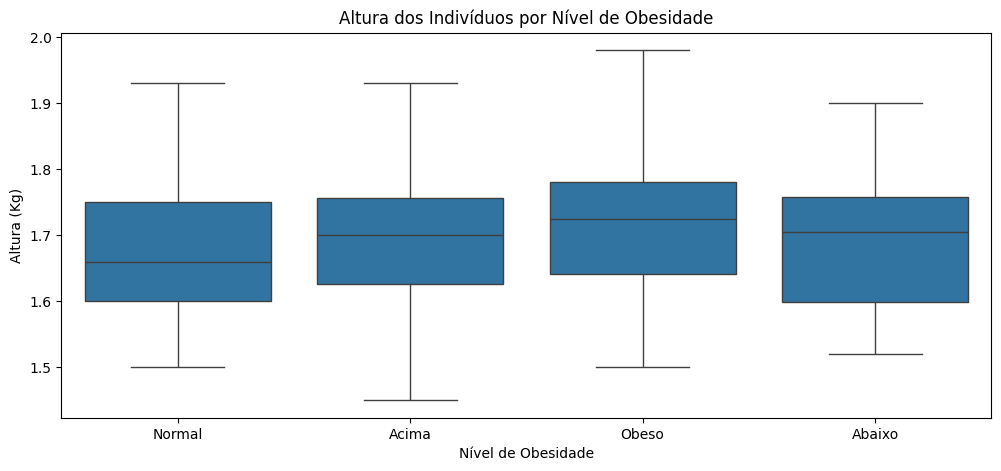

In [ ]:
# Boxplot do Altura dos indivíduos por nível de obesidade
plt.figure(figsize=(12,5))
sns.boxplot(x='classe_peso', y='altura', data=base_filtrada)
plt.title('Altura dos Indivíduos por Nível de Obesidade')
plt.xlabel('Nível de Obesidade')
plt.ylabel('Altura (Kg)')
plt.show()

O boxplot da variável altura mostra que não existe diferença entre os níveis de obesidade baseado apenas na altura dos indivíduos. Porém, é possível que esta variável em composição com outras, ajude a classificar o nível de obesidade.

# Matriz de Correlação

A matriz de correlação mede a força e a direção de uma relação linear que os atributos numéricos dos níveis de obesidade possam ter. Valores próximos a 1 indicam uma forte correlação positiva, -1 uma forte correlação negativa, e 0 ausência de correlação linear.

In [ ]:
# Matriz de Correlação
selecionando_colunas_corr = ['idade', 'peso', 'altura', 'consumo_vegetais_dia', 'qtd_ref_principal', 'consumo_agua_dia', 'freq_ativ_fisica', 'tempo_uso_disp_elet_dia']
base_para_correlacao = base.filter(items=selecionando_colunas_corr) # Selecionando apenas as colunas de interesse
print("\nMatriz de Correlação:")
base_para_correlacao.corr()


Matriz de Correlação:


,idade,peso,altura,consumo_vegetais_dia,qtd_ref_principal,consumo_agua_dia,freq_ativ_fisica,tempo_uso_disp_elet_dia
idade,1.000000,0.202560,-0.025958,0.016291,-0.043944,-0.045304,-0.144938,-0.296931
peso,0.202560,1.000000,0.463136,0.216125,0.107469,0.200575,-0.051436,-0.071561
altura,-0.025958,0.463136,1.000000,-0.038121,0.243672,0.213376,0.294709,0.051912
consumo_vegetais_dia,0.016291,0.216125,-0.038121,1.000000,0.042216,0.068461,0.019939,-0.101135
qtd_ref_principal,-0.043944,0.107469,0.243672,0.042216,1.000000,0.057088,0.129504,0.036326
consumo_agua_dia,-0.045304,0.200575,0.213376,0.068461,0.057088,1.000000,0.167236,0.011965
freq_ativ_fisica,-0.144938,-0.051436,0.294709,0.019939,0.129504,0.167236,1.000000,0.058562
tempo_uso_disp_elet_dia,-0.296931,-0.071561,0.051912,-0.101135,0.036326,0.011965,0.058562,1.000000


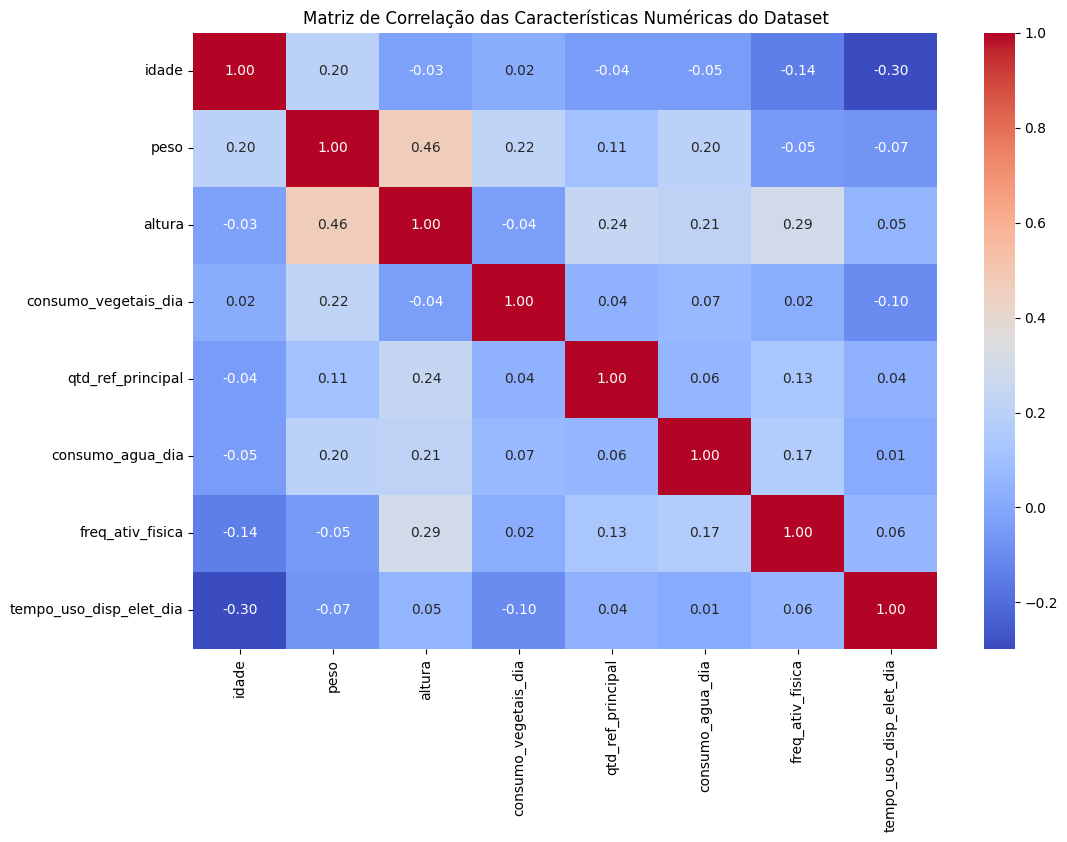

In [ ]:
# mapa de calor das variáveis numéricas
plt.figure(figsize=(12, 8))
sns.heatmap(base_para_correlacao.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação das Características Numéricas do Dataset')
plt.show()

O mapa de calor da matriz de correlação não revela correlação entre as variáveis. A correlação mais alta fica entre peso e altura, mas não pode ser considerada significativa.

# Tratamento de Valores Nulos

In [ ]:
# Verificando a presença de valores nulos no dataset original
print("Valores nulos no dataset Iris:")
base.isnull().sum()

Valores nulos no dataset Iris:


,0
genero,0
idade,0
altura,0
peso,0
familiar_sobrepeso,0
ali_calo_com_freq,0
consumo_vegetais_dia,0
qtd_ref_principal,0
qtd_ref_nao_principal,0
fumante,0


O dataset não possui valores nulos.

# Pré-Processamento de Dados
O pré-processamento de dados é importante etapa para preparar a base de dados para modelagem, garantindo que estejam no formato adequado e otimizados para o desempenho do algorismo.

# Criação de Recursos
Construção de Recursos: Para este dataset, a informação de IMC pode ser bastante importante. Trata-se de uma característica resumida utilizando os dados de peso e altura dos indivíduos. Por este motivo, vamos adicionar este atributo ao DataSet.

In [ ]:
base['IMC'] = base['peso'] / base['altura']**2
base.head()

,genero,idade,altura,peso,familiar_sobrepeso,ali_calo_com_freq,consumo_vegetais_dia,qtd_ref_principal,qtd_ref_nao_principal,fumante,consumo_agua_dia,monitoramento_caloria,freq_ativ_fisica,tempo_uso_disp_elet_dia,freq_bebida_alc_sem,transporte_usado,nivel_obesidade,classe_peso,IMC
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight,Normal,24.386526
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight,Normal,24.238227
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight,Normal,23.765432
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I,Acima,26.851852
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II,Acima,28.342381


# Transformação Categórica
One-hot Encoding

In [ ]:
# Antes de iniciar o método de transformação One-hot encoding, vamos selecionar as variáveis categóricas desejadas
var_categoria = ['fumante']

# Selecionando apenas as colunas de interesse
base_para_transformacao = base.filter(items=var_categoria)

base_para_transformacao.head()

# Definindo o transformador como one hot encoding
encoder_base = OneHotEncoder(sparse_output=False).fit_transform(base_para_transformacao)

# Exibindo os dados transformados
print("Atributos Transformados:")
print(encoder_base[:5, :]) # 5 primeiras linhas

Atributos Transformados:
[[1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [ ]:
# Adicionando as variáveis transformadas ao DataSet original

# Transformando as colunas criadas em DataFrame
colunas_criadas = pd.DataFrame(encoder_base, columns=['Fumante_nao', 'Fumante_sim'])

# Incluindo as colunas criadas no DataSet
base[['Fumante_nao', 'Fumante_sim']] = pd.DataFrame({'Fumante_nao': colunas_criadas['Fumante_nao'],
                                                     'Fumante_sim': colunas_criadas['Fumante_sim']})

# Visulizando as novas colunas no DataSet
base.head()

,genero,idade,altura,peso,familiar_sobrepeso,ali_calo_com_freq,consumo_vegetais_dia,qtd_ref_principal,qtd_ref_nao_principal,fumante,...,monitoramento_caloria,freq_ativ_fisica,tempo_uso_disp_elet_dia,freq_bebida_alc_sem,transporte_usado,nivel_obesidade,classe_peso,IMC,Fumante_nao,Fumante_sim
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,...,no,0.0,1.0,no,Public_Transportation,Normal_Weight,Normal,24.386526,1.0,0.0
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,...,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight,Normal,24.238227,0.0,1.0
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,...,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight,Normal,23.765432,1.0,0.0
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,...,no,2.0,0.0,Frequently,Walking,Overweight_Level_I,Acima,26.851852,1.0,0.0
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,...,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II,Acima,28.342381,1.0,0.0


# Divisão da base
O DataSet pode ser dividido em base de treinamento e base de teste.

**Método Holdout**

In [ ]:
# Separar atributos: variáveis explicativas (X)
# Separar target: Variável resposta (y)
X = base.drop('classe_peso', axis=1)
y = base['nivel_obesidade']

In [ ]:
# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=56, stratify=y)

In [ ]:
print(f"Dimensões de X_train: {X_train.shape}")
print(f"Dimensões de X_test: {X_test.shape}")
print(f"Dimensões de y_train: {y_train.shape}")
print(f"Dimensões de y_test: {y_test.shape}")

Dimensões de X_train: (1477, 20)
Dimensões de X_test: (634, 20)
Dimensões de y_train: (1477,)
Dimensões de y_test: (634,)


# Normalização
A normalização redimensiona os dados de um ou mais atributos do intervalo original para o intervalo entre 0 a 1, com o objetivo de alterar os valores para uma escala comum, sem distorcer as diferenças nos intervalos de valores.

Esta é uma boa técnica para usar quando não se conhece bem a distribuição dos dados ou quando se sabe que a distribuição não é gaussiana (normal).

In [ ]:
# Inicializar o MinMaxScaler
scaler_norm = MinMaxScaler()

In [ ]:
# Antes de iniciar a normalização, vamos filtrar apenas as variáveis numéricas
var_num = ['idade', 'peso', 'altura', 'consumo_vegetais_dia', 'qtd_ref_principal', 'consumo_agua_dia', 'freq_ativ_fisica', 'tempo_uso_disp_elet_dia' 'IMC']

# Selecionando apenas as colunas de interesse
X_train_num = X_train.filter(items=var_num)
X_test_num = X_test.filter(items=var_num)

# Aprende min e max APENAS de X_train
scaler_norm.fit(X_train_num)
X_train_num_normalized = scaler_norm.transform(X_train_num)
# Usa a média e o desvio padrão aprendidos de X_train
X_test_num_normalized = scaler_norm.transform(X_test_num)

In [ ]:
# Exibir as primeiras linhas dos dados normalizados (como DataFrame para melhor visualização)
X_num_normalized = pd.DataFrame(X_train_num_normalized, columns=X_train_num.columns)

In [ ]:
print("\nPrimeiras 5 linhas dos dados sem normalizar (dados originais):")
print(X_train_num.head())
print("\nPrimeiras 5 linhas dos dados normalizados (treino):")
print(X_num_normalized.head())


Primeiras 5 linhas dos dados sem normalizar (dados originais):
          idade        peso    altura  consumo_vegetais_dia  \
1849  26.000000  104.899348  1.602025              3.000000   
1343  18.000000  109.207614  1.783906              2.000000   
1646  24.825398  120.901591  1.796332              2.195964   
1606  29.906575  129.232216  1.913252              2.024720   
1084  23.000000   90.000000  1.774330              2.116432   

      qtd_ref_principal  consumo_agua_dia  freq_ativ_fisica  
1849           3.000000          2.613928          0.000000  
1343           1.867836          2.438398          1.000000  
1646           3.000000          2.514872          1.664722  
1606           3.000000          1.800335          1.196368  
1084           3.000000          1.002292          0.000000  

Primeiras 5 linhas dos dados normalizados (treino):
      idade      peso    altura  consumo_vegetais_dia  qtd_ref_principal  \
0  0.239130  0.491786  0.289206              1.000000   

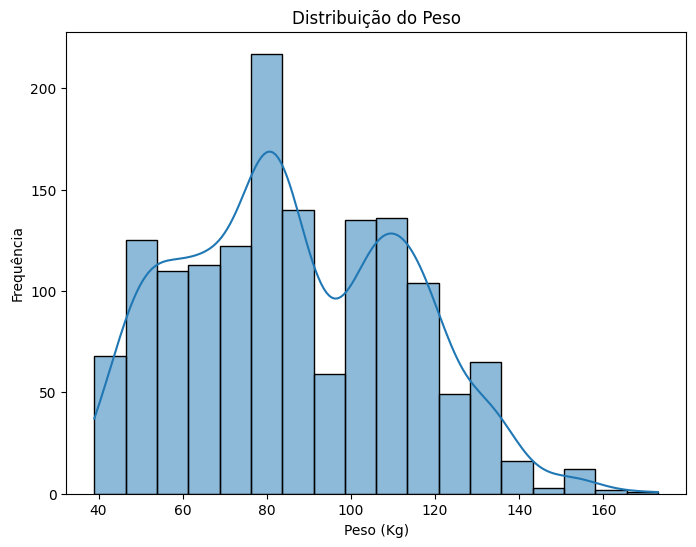

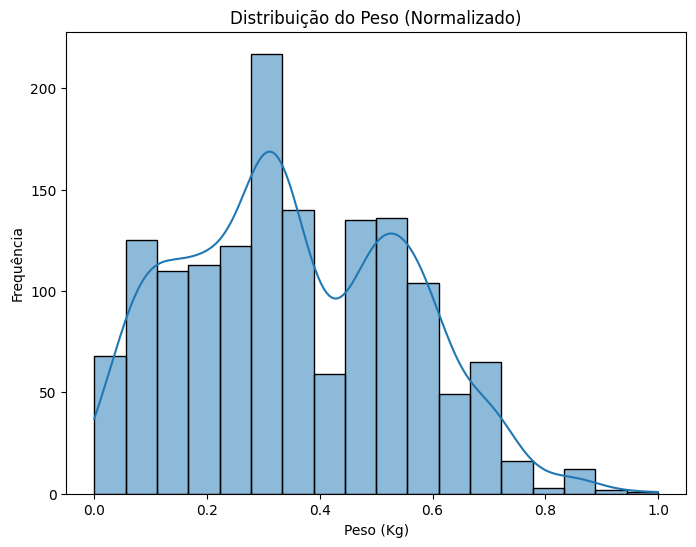

In [ ]:
# Visualização da distribuição antes da normalização (exemplo para uma característica: Peso)
plt.figure(figsize=(8, 6))
sns.histplot(X_train_num['peso'], kde=True)
plt.title('Distribuição do Peso')
plt.xlabel('Peso (Kg)')
plt.ylabel('Frequência')
plt.show()

# Visualização da distribuição após a normalização (exemplo para uma característica: Peso)
plt.figure(figsize=(8, 6))
sns.histplot(X_num_normalized['peso'], kde=True)
plt.title('Distribuição do Peso (Normalizado)')
plt.xlabel('Peso (Kg)')
plt.ylabel('Frequência')
plt.show()

O histograma do peso dos indivíduos após a normalização mostra que os valores foram escalados para o intervalo de 0 a 1, mantendo a forma da distribuição original.

# Padronização

A padronização (ou Z-score scaling) transforma os dados para ter média 0 e desvio padrão 1. É útil para algoritmos que são sensíveis à escala das características, como SVMs ou redes neurais.

In [ ]:
# Inicializar o StandardScaler
scaler_std = StandardScaler()

In [ ]:
# Aprende média e desvio padrão APENAS de X_train_num
scaler_std.fit(X_train_num)
X_train_num_standardized = scaler_std.transform(X_train_num)
# Usa a média e o desvio padrão aprendidos de X_train_num
X_test_num_standardized = scaler_std.transform(X_test_num)

In [ ]:
# Exibir as primeiras linhas dos dados padronizados (como DataFrame para melhor visualização)
X_num_standardized = pd.DataFrame(X_train_num_standardized, columns=X_train_num.columns)

In [ ]:
print("\nPrimeiras 5 linhas dos dados sem padronizar (dados originais):")
print(X_train_num.head())
print("\nPrimeiras 5 linhas dos dados padronizados (treino):")
print(X_num_standardized.head())




Primeiras 5 linhas dos dados sem padronizar (dados originais):
          idade        peso    altura  consumo_vegetais_dia  \
1849  26.000000  104.899348  1.602025              3.000000   
1343  18.000000  109.207614  1.783906              2.000000   
1646  24.825398  120.901591  1.796332              2.195964   
1606  29.906575  129.232216  1.913252              2.024720   
1084  23.000000   90.000000  1.774330              2.116432   

      qtd_ref_principal  consumo_agua_dia  freq_ativ_fisica  
1849           3.000000          2.613928          0.000000  
1343           1.867836          2.438398          1.000000  
1646           3.000000          2.514872          1.664722  
1606           3.000000          1.800335          1.196368  
1084           3.000000          1.002292          0.000000  

Primeiras 5 linhas dos dados padronizados (treino):
      idade      peso    altura  consumo_vegetais_dia  qtd_ref_principal  \
0  0.267416  0.692149 -1.076802              1.097813   

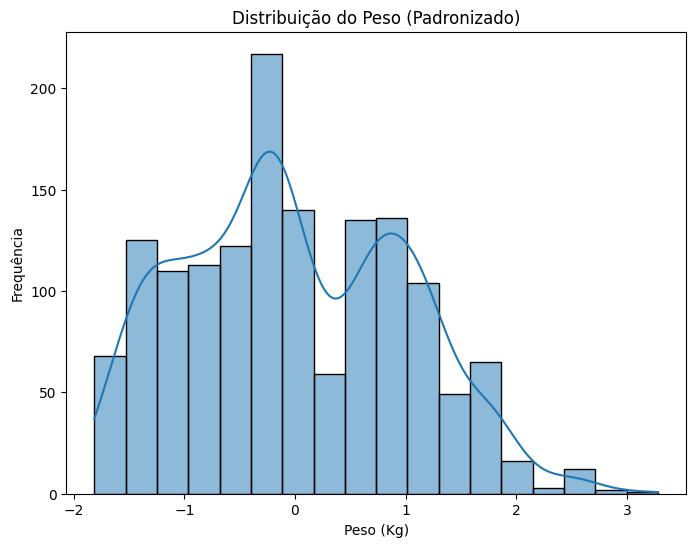

In [ ]:
# Visualização da distribuição após a padronização (exemplo para uma característica: Peso)
plt.figure(figsize=(8, 6))
sns.histplot(X_num_standardized['peso'], kde=True)
plt.title('Distribuição do Peso (Padronizado)')
plt.xlabel('Peso (Kg)')
plt.ylabel('Frequência')
plt.show()

O histograma de *peso* após a padronização mostra que os valores foram transformados para ter uma média próxima de zero e um desvio padrão de um, centralizando a distribuição.

# Novas Análises

Durante a etapa de transformações dos dados foi criado uma variável que parece ser bastante significativa para distinção dos níveis de obesidade. Por este motivo, vamos fazer nova análise descritiva dos dados.

In [ ]:
base_filtrada_nova2 = base[['classe_peso', 'IMC']]
base_filtrada_nova2.groupby('classe_peso').describe()

IMC                                                        \
             count       mean       std        min        25%        50%   
classe_peso                                                                
Abaixo       272.0  17.404245  0.786231  12.998685  17.095501  17.547455   
Acima        580.0  27.103002  1.341359  22.826739  25.970926  26.989619   
Normal       287.0  22.014147  1.842017  18.491124  20.673154  22.145329   
Obeso        972.0  36.960164  4.540834  29.911958  32.793769  36.337595   

                                   
                   75%        max  
classe_peso                        
Abaixo       17.906245  19.082206  
Acima        28.160777  30.362877  
Normal       23.688544  24.913495  
Obeso        40.580528  50.811753

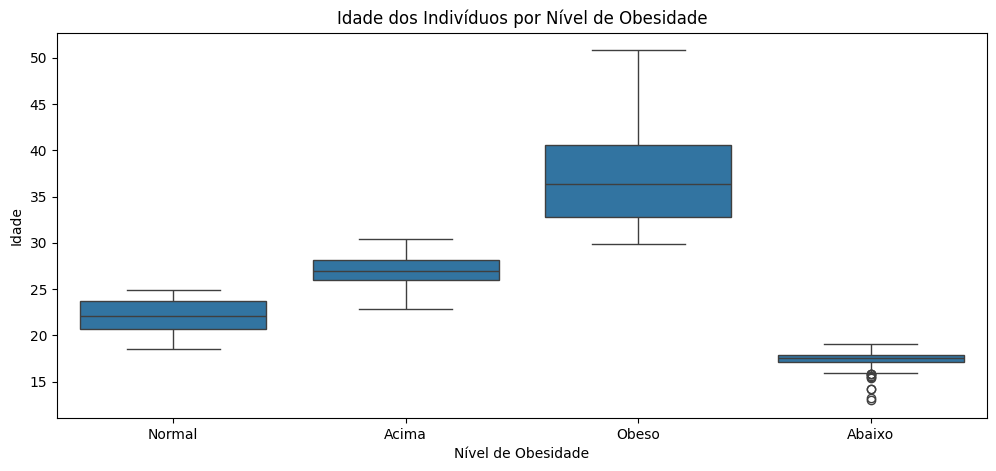

In [ ]:
# Boxplot da idade dos indivíduos por nível de obesidade
plt.figure(figsize=(12,5))
sns.boxplot(x='classe_peso', y='IMC', data=base)
plt.title('Idade dos Indivíduos por Nível de Obesidade')
plt.xlabel('Nível de Obesidade')
plt.ylabel('Idade')
plt.show()

A partir da variável criada "IMC" é possível diferenciar com mais facilidade os níveis de obesidade, como podemos visualizar no boxplot e também nas estattisticas descritivas acima.  

# Conclusão
A análise e pré-processamento do dataset demonstram a importância de entender a estrutura dos dados antes da modelagem. O dataset é limpo e balanceado. Entretando a variável resposta "nível de obesidade" tinha sete possíveis classificações. Para facilitar o estudo e melhorar a visualização dos gráficos, foi realizado um agrupamento da variável resposta, resultando em apenas quatro níveis de obesidade. A nova variável resposta ficou desbalanceada, tendo a classe "Obeso" com 46% da distribuição.

 As características numéricas peso, idade e altura não definem bem uma separação entre os níveis de obesidade. Para uma melhor estimativa da variável resposta é necessário analisar outros atributos do dataset ou criar outras variáveis.

 A análise exploratória das variáveis numéricas não revelou correlações entre os atributos. Estatísticas descritivas, boxplots e histogramas são de extremamente importantes para entendimento da base de dados.

 As etapas de criação de recursos, transformação categórica, normalização e padronização são fundamentais para preparar os dados para diversos algoritmos de aprendizado de máquina, garantindo que o modelo possa aprender eficientemente com as relações presentes nos dados.





# Hipóteses
As três hipóteses levantadas foram validadas:


1.   Os diferentes níveis de obesidade podem ser diferenciados com base nas informações de peso, altura e idade?

  Não. Conforme analisado nas estatísticas descritivas e nos boxplots, apenas com as variáveis de peso, altura e idade não foi possível diferenciar os níveis de obesidade. É necessário a ajuda de outros atributos para estimar os níveis de obesidade.

2.   Existe correlação entre as variáveis numéricas do DataSet?

  Não. De acordo com o mapa de calor das correlações entre as variáveis numéricas, não existe uma alta correlação entre as variáveis. A maior correlação fica entre peso e altura, mas não pode ser considerada significativa.  

3.   O nível de obesidade "Obeso" é mais facilmente separável dos outros níveis analisando apenas as variáveis peso e altura?

  Não. Apenas com essas duas variáveis não foi possível separar os níveis de obesidade. Porém esses dois atributos deram origem a um novo atributo no dataset. A partir deste novo atributo - IMC - foi possível perceber através do resumo das estatísticas descritivas e do boxplot um comportamento diferente para cada nível de obesidade.